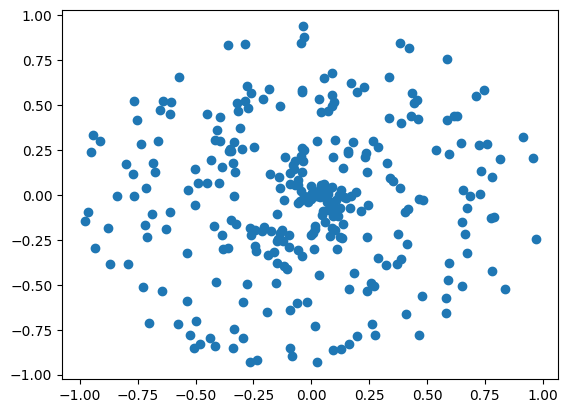

In [31]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X,y = spiral_data(samples=100,classes=3)
plt.scatter(X[:,0],X[:,1])
plt.show()

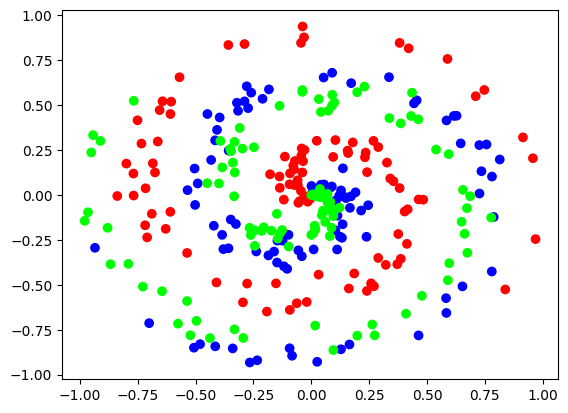

In [32]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()

THE NEURAL NETWORK WILL BE UNAWARE OF THE COLORS AS THE DATA HAVE NO CLASS ENCODINGS

DENSER LAYER CLASS

In [33]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

# DENSE LAYER
class Layer_Dense:
    # Layer Initialization
    def __init__(self,n_inputs,n_neurons):
        #Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    # Forward Pass
    def forward(self,inputs):
        # Calculate output values from inputs,weights and biases
        self.output = np.dot(inputs,self.weights) + self.biases


# Create dataset
X,y = spiral_data(samples=100,classes=3)
# Create Dense Layer with 2 input features and 3 ouput values
dense1 = Layer_Dense(2,3)
# Perform a forward pass of oour training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:
print(dense1.output[:10])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]
 [-3.5430698e-04  3.5025488e-04 -2.3363481e-04]
 [-8.9267001e-04  1.0767876e-03 -1.9453237e-04]
 [-9.3350781e-04  1.0723802e-03 -3.1227397e-04]
 [-1.1243758e-03  1.3112801e-03 -3.3629674e-04]
 [-1.3386955e-03  1.6200906e-03 -2.8101794e-04]]


ACTIVATION FUNCTION : RELU

In [34]:
import numpy as np
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = np.maximum(0,inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [35]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self,inputs):
        # Calculate output values from input
        self.output = np.maximum(0,inputs)

In [36]:
# Create datasets
X,y = spiral_data(samples=100,classes=3)
# Create Dense Layer with 2 inputs features and 3 output values
dense1 = Layer_Dense(2,3)
# Create ReLU activation (to be used with Dense Layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Forward pass through activation function
# Takes in output from previous layer
activation1.forward(dense1.output)
# Let's see output of the first few examples:
print(activation1.output[:5])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


ACTIVATION FUNCTION: SOFTMAX

In [37]:
# Softmax Activation
class Activation_Softmax:
    # Forward pass
    def forward(self,inputs):
        # Get Unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values,axis=1,keepdims=True)
        self.output = probabilities

In [38]:
# Create dataset
X, y = spiral_data(samples=100,classes=3)

# Create Dense Layer with 2 inputs features and 3 ouput values
dense1 = Layer_Dense(2,3)

# Create ReLU activation (to be used with Dense Layer)
activation1 = Activation_ReLU()

# Create second Dense Layer with 3 inputs features(as we take output of 
# previous layer here) and 3 output values
dense2 = Layer_Dense(3,3)

# Create Softmax Activation (to be used with Dense Layer)
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function it takes the output of second dense layer here
activation2.forward(dense2.output)

# Output samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333364 0.3333334  0.3333329 ]
 [0.33333385 0.3333335  0.33333266]
 [0.33333433 0.3333336  0.33333206]
 [0.33333462 0.33333373 0.33333164]]


 CLACULATING NETWORK ERROR WITH LOSS

CROSS ENTROPY LOSS BUILDING BLOCKS IN PYTHON

In [39]:
softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],[0.02,0.9,0.08]])

class_targets=[0,1,1]
print(softmax_outputs[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [40]:
print(-np.log(softmax_outputs[range(len(softmax_outputs)),class_targets]))
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])
average_loss = np.mean(neg_log)

print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


IF DATA IS ONE HOT ENCODED ,HOW TO EXTRACT THE RELEVANT PREDICTIONS

In [41]:
y_true_check = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

y_pred_clipped_check = np.array([
    [0.7,0.1,0.2],
    [0.1,0.5,0.4],
    [0.02,0.9,0.08]
])

A = y_true_check * y_pred_clipped_check
B = np.sum(A, axis=1)
C = -np.log(B)

print(C)

print(np.mean(C))

[0.35667494 0.69314718 2.52572864]
1.191850256268978


IMPLEMENTING THE CATEGORICAL CROSS ENTROPY CLASS

In [42]:
import numpy as np

# Cross-entropy loss (standalone class)
class Loss_CategoricalCrossentropy():
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # Probabilities for target values
        if len(y_true.shape) == 1:  # categorical labels
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:  # one-hot encoded labels
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def calculate(self, y_pred, y_true):
        return np.mean(self.forward(y_pred, y_true))

# Test data
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                           [0.1, 0.5, 0.4],
                           [0.02, 0.9, 0.08]])

class_targets = np.array([[1, 0, 0],
                         [0, 1, 0],
                         [0, 1, 0]])

# Calculate loss
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


In [43]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])
# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.3333341  0.33333302 0.3333329 ]
 [0.3333341  0.33333302 0.33333296]
 [0.3333341  0.333333   0.33333293]
 [0.3333364  0.33333203 0.33333158]]
loss: 1.0986193
acc: 0.28


In [44]:
import numpy as np
# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)

acc: 0.6666666666666666


THE NEED FOR OPTIMIZATION

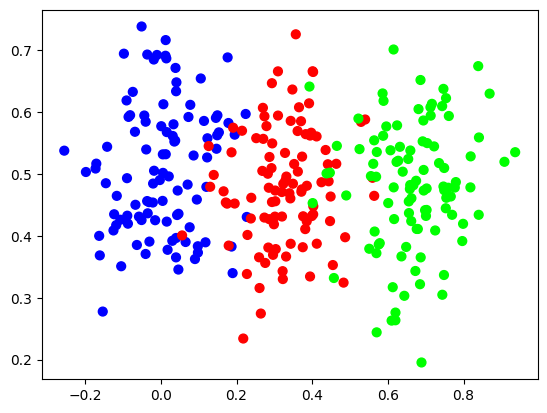

In [45]:
# SIMPLER DATASET
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

X,y = vertical_data(samples=100,classes=3)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap='brg')
plt.show()

STRATERGY 1: RANDOMLY SELECT WEIGHTS AND BIASES: DOES NOT WORK

In [46]:
# Create dataset
X,y = vertical_data(samples=100,classes=3)
# Create model
dense1 = Layer_Dense(2,3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3) # second dense layer, 3 inputs, 3 ouputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # Some initial values
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    # Generate a new set of weights for iteration
    dense1.weights = 0.05*np.random.randn(2,3)
    dense1.biases = 0.05*np.random.randn(1,3)
    dense2.weights = 0.05*np.random.randn(3,3)
    dense2.biases = 0.05*np.random.randn(1,3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the ouput of second dense layer here and return loss

    loss = loss_function.calculate(activation2.output,y)

    # Calculate accuracy from output of activation2 and targets
    # Calculate values along first axis

    predictions = np.argmax(activation2.output,axis=1)
    accuracy = np.mean(predictions == y)

    # If loss is smaller - print and save weights and biases aside

    if loss < lowest_loss:
        print('New set of weights found,iteration: ',iteration,'loss : ',loss,'acc: ',accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.weights.copy()
        lowest_loss = loss


New set of weights found,iteration:  0 loss :  1.1016203 acc:  0.3333333333333333
New set of weights found,iteration:  1 loss :  1.1002508 acc:  0.3333333333333333
New set of weights found,iteration:  2 loss :  1.0992025 acc:  0.3333333333333333
New set of weights found,iteration:  3 loss :  1.0986239 acc:  0.3333333333333333
New set of weights found,iteration:  10 loss :  1.0984299 acc:  0.3333333333333333
New set of weights found,iteration:  22 loss :  1.0976521 acc:  0.36333333333333334
New set of weights found,iteration:  150 loss :  1.0974255 acc:  0.3333333333333333
New set of weights found,iteration:  874 loss :  1.0972673 acc:  0.3333333333333333
New set of weights found,iteration:  894 loss :  1.096895 acc:  0.3333333333333333
New set of weights found,iteration:  1036 loss :  1.095428 acc:  0.3333333333333333
New set of weights found,iteration:  88633 loss :  1.0952065 acc:  0.3333333333333333


STRATERGY 2: RANDOMLY ADJUST WEIGHTS AND BIASES - WORKS

In [47]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1008747 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.1005714 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.099462 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0994359 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.09855 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.098517 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0938607 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0920315 acc: 0.3333333333333333
New set of weights found, iteration: 17 loss: 1.091391 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0910357 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0898421 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0843327 acc: 0.3333333333333333
New set of weights found, iteration: 26 loss: 1.0

STRATERGY 2: FOR SPIRAL DATASET - DOES NOT WORK

In [48]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss 
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0991902 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0988214 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0982754 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0978643 acc: 0.3333333333333333
New set of weights found, iteration: 23 loss: 1.0972557 acc: 0.35
New set of weights found, iteration: 37 loss: 1.0970367 acc: 0.35
New set of weights found, iteration: 40 loss: 1.0958394 acc: 0.37
New set of weights found, iteration: 41 loss: 1.0950066 acc: 0.4066666666666667
New set of weights found, iteration: 44 loss: 1.0948946 acc: 0.37333333333333335
New set of weights found, iteration: 53 loss: 1.0943341 acc: 0.3933333333333333
New set of weights found, iteration: 58 loss: 1.0942849 acc: 0.36666666666666664
New set of weights found, iteration: 59 loss: 1.0941792 acc: 0.35
New set of weights found, iteration: 60 loss: 1.0926698 acc: 0.38666666666666666
New set of weigh

BACKPROPAGATION

GRADIENTS OF THE LOSS WITH RESPECT TO WEIGHTS

In [49]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values

dvalues = np.array([[1,1,1],
                    [2,2,2],[3,3,3]])

# We have 3 sets of inputs - samples
inputs = np.array([[1,2,3,2.5],
                   [2,5,-1,2],[-1.5,2.7,3.3,-0.8]])

# Sum weights of given input 
# and multiply by the passed-in gradient for this neuron

dweights = np.dot(inputs.T,dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


GRADIENTS OF THE LOSS WITH RESPECT TO BIASES

In [50]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values

dvalues = np.array([[1,1,1],[2,2,2],[3,3,3]])

# One bias for each neuron
# biases are the row vector with a shape(1,neurons)

biases = np.array([[2,3,0.5]])

# dbiases - sum values,do this over samples (first axis), keepdims
# Since this by default will produce a plain list - 
# We explained this is in the chapter 4

dbiases = np.sum(dvalues,axis=0,keepdims=True)
print(dbiases)


[[6 6 6]]


GRADIENTS OF THE LOSS WITH RESPECT TO INPUTS

In [51]:
import numpy as np

# Passed-in gradient from the next layer
# for this purpose of this example we're going to use
# an array of an incremental gradient values

dvalues = np.array([[1,1,1],[2,2,2],[3,3,3]])

# We have 3 sets of weights - one set for each neuron
# We have 4 inputs,thus 4 weights
# recall that we keep weights transposed

weights = np.array([[0.2,0.8,-0.5,1],[0.5,-0.91,0.26,-0.5],[-0.26,-0.27,0.17,0.87]]).T

# Sum weights of given input
# and multiply by the passed-in gradient for this neuron

dinputs = np.dot(dvalues,weights.T)
print(dinputs)


[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


ADDING THE "BACKWARD" METHOD IN THE LAYER-DENSE CLASS

In [52]:
# class Layer_Dense:
# ...
# # Backward pass
# def backward(self,dvalues):
# # Gradients on parameters
# self.dweights = np.dot(self.inputs.T,dvalues)
# self.dbiases = np.sum(dvalues,axis=0,keepdims=True)
# # Gradient on values
# self.dinputs = np.dot(dvalues,self.weights.T)

ADDING THE "BACKWARD" METHOD IN THE RELU ACTIVATION CLASS

In [53]:
# # ReLU Activation
# class Activation_ReLU:
# # Forward pass
# def forward(self,inputs):
# # Remember input values
# self.inputs = inputs
# self.output = np.maximum(0,inputs)
# # Backward pass
# def backward(self,dvalues):
# # Since we need to modify the original variable,
# # let's make a copy of the values first

# self.dinputs = dvalues.copy()
# # Zero gradient where input values were negative 
# self.dinputs[self.inputs <= 0] = 0

LOSS FUNCTION BACKPROPAGATION

In [55]:
# Common Loss Class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self,output,y):
  # Calculate sample losses
  sample_losses = self.forward(output,y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return losses
  return data_loss

In [ ]:
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


Softmax classifier - combined Softmax activation and cross-entropy loss for faster backward step

In [56]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


In [57]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs
print('Gradients: combined loss and activation:')
print(dvalues1)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


SUMMARIZING THE ENTIRE NEURAL NETWORK

ALL CLASSES TOGETHER


CREATING LAYERS: FORWARD AND BACKWARD PASS

In [59]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


RELU ACTIVATION: FORWARD AND BACKWARD PASS

In [60]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let’s make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


SOFTMAX ACTIVATION: FORWARD PASS

In [61]:
# Softmax activation
class Activation_Softmax:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities

LOSS CLASS

In [62]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

CATEGORICAL CROSS ENTROPY LOSS: FORWARD AND BACKWARD PASS

In [63]:
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

COMBINED SOFTMAX ACTIVATION AND CATEGORICAL CROSS ENTROPY FOR LAST LAYER: FORWARD AND BACKWARD PASS

In [64]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

DATASET

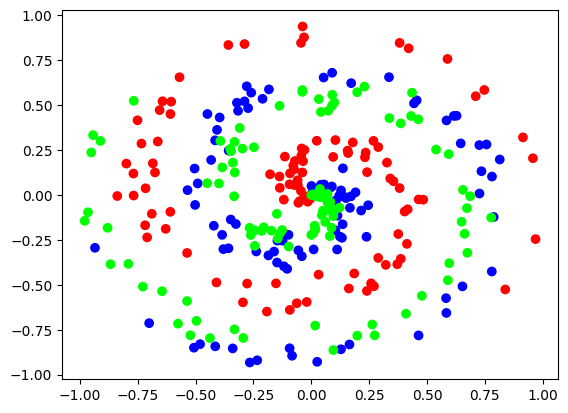

In [65]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

FULL CODE UPTO THIS POINT: FORWARD AND BACKWARD PASS

In [66]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)
# Create Softmax classifier’s combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)

# Let’s see output of the first few samples:
print(loss_activation.output[:5])
# Print loss value
print('loss:', loss)
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)
# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)
# Print gradients
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.3333333  0.33333334]
 [0.3333335  0.33333302 0.33333355]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0986118
acc: 0.33666666666666667
[[ 7.7209341e-05 -1.0590541e-04 -8.3512554e-05]
 [ 2.8525142e-04  6.1521467e-05 -9.9994701e-05]]
[[ 0.00036935 -0.00025332  0.00021116]]
[[ 1.04255480e-04  1.59160336e-05 -1.20171506e-04]
 [-4.91499777e-05  1.94195833e-04 -1.45045851e-04]
 [ 3.61476232e-05  1.08254273e-04 -1.44401885e-04]]
[[ 1.0388438e-05 -1.0533840e-05  3.9814040e-08]]
